In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format ='retina'

In [2]:
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import seaborn as sns

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

In [3]:
folders = [file for file in os.listdir() if not os.path.isfile(file)]
folders_all = []
for folder in folders:
    # if folder[0] != '.' and folder == 'result':
    if folder[0] != '.' and folder == 'result_cifar10_vgg':
        folders_all.append(folder)

In [5]:
matplotlib.rc('text', usetex=False)
# matplotlib.rc('text.latex', preamble=[r'\usepackage{sansmath}', r'\sansmath'])
# matplotlib.rc('font', **{'family':'sans-serif','sans-serif':['DejaVu Sans']})

matplotlib.rc('xtick.major', pad=12)
matplotlib.rc('ytick.major', pad=12)
matplotlib.rc('grid', linewidth=0)
# matplotlib.rc('grid', linewidth=0.8)

sns.set_style('whitegrid')


class LogNormalize(colors.Normalize):

    def __init__(self, vmin=None, vmax=None, clip=None, log_alpha=None):
        self.log_alpha = log_alpha
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        log_v = np.ma.log(value - self.vmin)
        log_v = np.ma.maximum(log_v, self.log_alpha)
        return 0.9 * (log_v - self.log_alpha) / (np.log(self.vmax - self.vmin) - self.log_alpha)


def plane(axs_sub, grid, values, vmax=None, log_alpha=-5, N=7, cmap='jet_r', format_colorbar='%.1e'):
    cmap = plt.get_cmap(cmap)
    if vmax is None:
        clipped = values.copy()
    else:
        clipped = np.minimum(values, vmax)
    log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
    levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))
    levels[0] = clipped.min()
    levels[-1] = clipped.max()
    levels = np.concatenate((levels, [1e10]))
    norm = LogNormalize(clipped.min() - 1e-8, clipped.max() + 1e-8, log_alpha=log_alpha)
    # contour = axs_sub.contour(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, norm=norm,
    #                       linewidths=2.5,
    #                       zorder=1,
    #                       levels=levels)
    contourf = axs_sub.contourf(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, norm=norm,
                            levels=levels,
                            zorder=0,
                            alpha=0.8)
    colorbar = fig.colorbar(contourf, ax=axs_sub, format=format_colorbar, location='left')
    

    labels = list(colorbar.ax.get_yticklabels())
    # labels[-1].set_text(r'$>\,$' + labels[-2].get_text())
    colorbar.ax.set_yticklabels(labels)
    contour = None
    return contour, contourf, colorbar

# plt.figure(figsize=(12.4, 7))

In [9]:

import matplotlib.ticker as mticker
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))

def plot_plane_each_trloss(axs_sub, folder, mu):
    file_read = np.load(folder + "/plan_curve_lr_0.1mu_"+str(mu)+"_c_0.0005-300.npz_plane.zpz.npz")
    contour, contourf, colorbar = plane(
        axs_sub,
        file_read['grid'],
        file_read['tr_loss'],
        vmax=5.0,
        log_alpha=-5.0,
        N=20,
        cmap='Spectral',
        format_colorbar=mticker.FuncFormatter(g)
    )

    bend_coordinates = file_read['bend_coordinates']
    curve_coordinates = file_read['curve_coordinates']

    axs_sub.scatter(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], marker='o', c='w', s=120, zorder=2)
    # axs_sub.scatter(bend_coordinates[1, 0], bend_coordinates[1, 1], marker='o', c='w', s=120, zorder=2)
    axs_sub.plot(curve_coordinates[:, 0], curve_coordinates[:, 1], linewidth=4, c='w', label='$w(t)$', zorder=4)
    # axs_sub.plot(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], c='w', linestyle='--', dashes=(3, 4), linewidth=3, zorder=2)

    axs_sub.margins(0.0)
    axs_sub.tick_params(axis='both', labelsize=14)
#     plt.xticks(fontsize=18)
    # colorbar.ax.tick_params(labelsize=18)
    # axs_sub.set_title(folder)



def plot_plane_each_teerror(axs_sub, folder, mu):
    file_read = np.load(folder + "/plan_curve_lr_0.1mu_"+str(mu)+"_c_0.0005-300.npz_plane.zpz.npz")
    contour, contourf, colorbar = plane(
        axs_sub,
        file_read['grid'],
        file_read['te_err'],
        vmax=40,
        log_alpha=-1.0,
        N=20,
        cmap='Spectral',
        format_colorbar=mticker.FuncFormatter(g)
    )

    bend_coordinates = file_read['bend_coordinates']
    curve_coordinates = file_read['curve_coordinates']

    axs_sub.scatter(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], marker='o', c='w', s=120, zorder=2)
    # axs_sub.scatter(bend_coordinates[1, 0], bend_coordinates[1, 1], marker='o', c='w', s=120, zorder=2)
    axs_sub.plot(curve_coordinates[:, 0], curve_coordinates[:, 1], linewidth=4, c='w', label='$w(t)$', zorder=4)
    # axs_sub.plot(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], c='k', linestyle='--', dashes=(3, 4), linewidth=3, zorder=2)

    axs_sub.margins(0.0)
    axs_sub.tick_params(axis='both', labelsize=14)



In [10]:

import matplotlib.ticker as mtick
plt.rcParams.update({'font.size': 12.5})


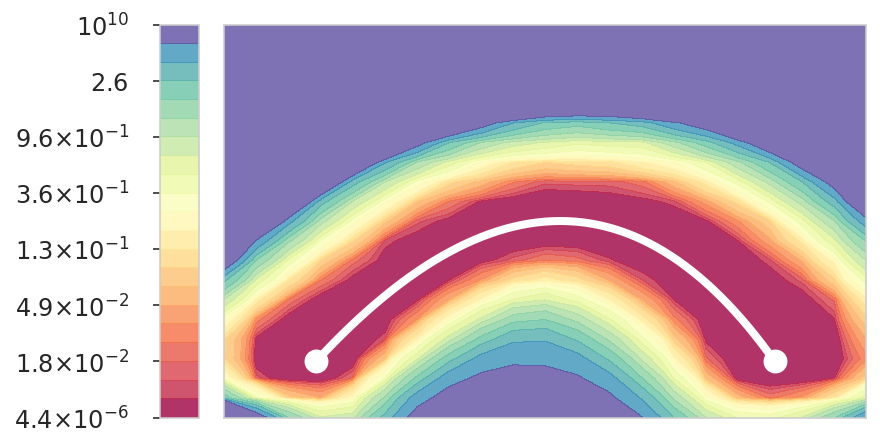

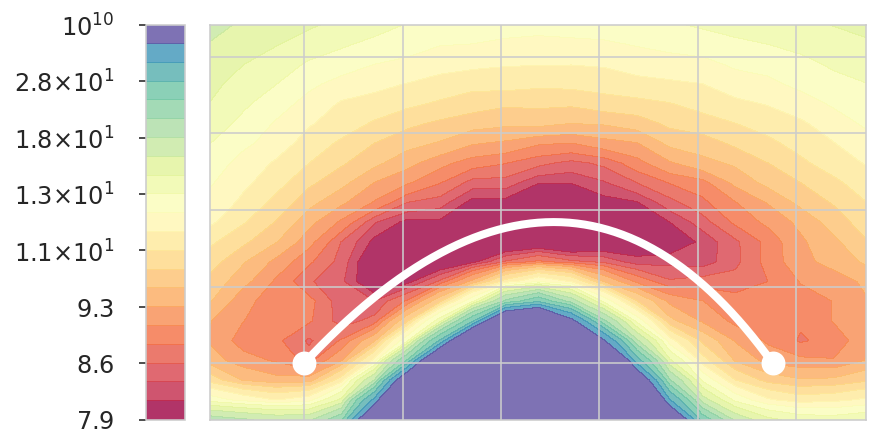

In [12]:
mu = 0.4

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)



if len(folders_all) == 1:
    # axs_sub = axs[0][0]
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_trloss(axs_sub, folders_all[0], mu=mu) # mu0.6

matplotlib.rc('grid', linewidth=0.8)


plt.savefig('cifar10_mu'+str(mu)+'_conn_train.pdf')

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)


if len(folders_all) == 1:
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_teerror(axs_sub, folders_all[0], mu=mu)


matplotlib.rc('grid', linewidth=0.8)

plt.savefig('cifar10_mu'+str(mu)+'_conn_test.pdf')

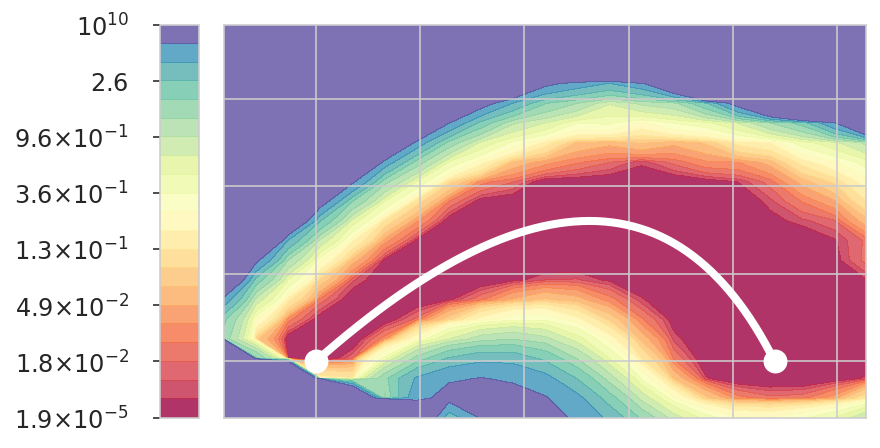

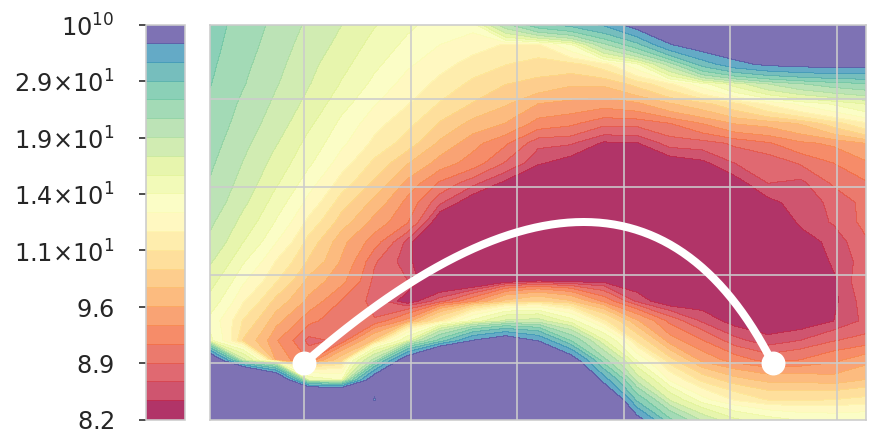

In [13]:
mu = 0.6

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)



if len(folders_all) == 1:
    # axs_sub = axs[0][0]
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_trloss(axs_sub, folders_all[0], mu=mu) # mu0.6

matplotlib.rc('grid', linewidth=0.8)


plt.savefig('cifar10_mu'+str(mu)+'_conn_train.pdf')

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)


if len(folders_all) == 1:
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_teerror(axs_sub, folders_all[0], mu=mu)


matplotlib.rc('grid', linewidth=0.8)

plt.savefig('cifar10_mu'+str(mu)+'_conn_test.pdf')

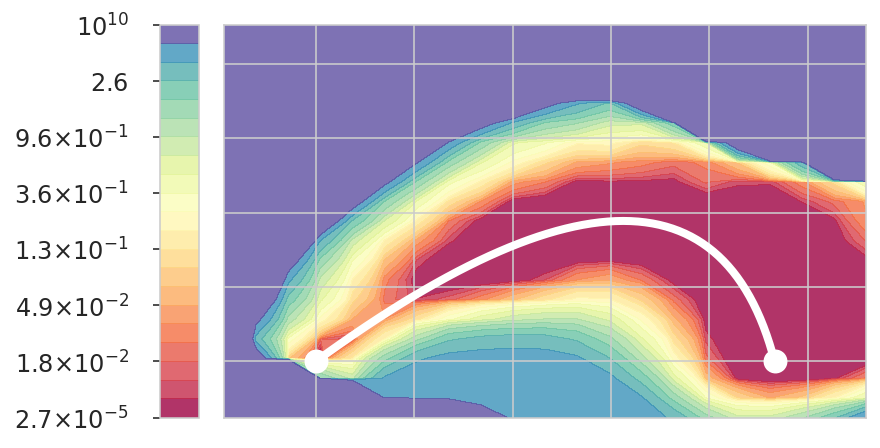

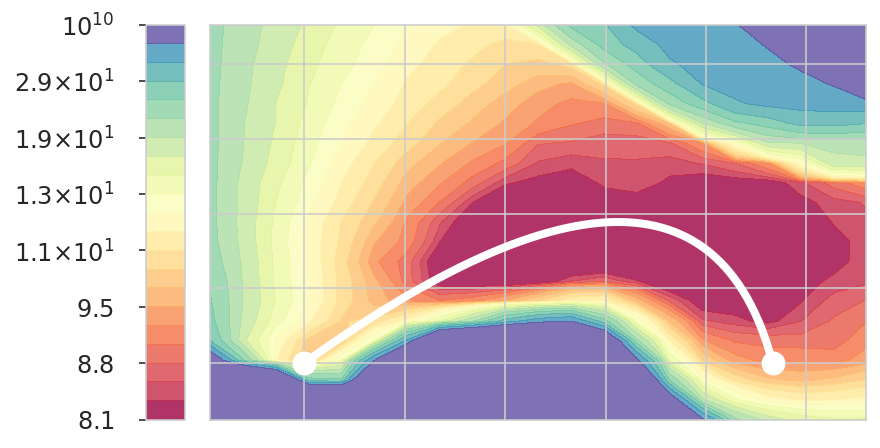

In [14]:
mu = 0.7

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)



if len(folders_all) == 1:
    # axs_sub = axs[0][0]
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_trloss(axs_sub, folders_all[0], mu=mu) # mu0.6

matplotlib.rc('grid', linewidth=0.8)


plt.savefig('cifar10_mu'+str(mu)+'_conn_train.pdf')

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)


if len(folders_all) == 1:
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_teerror(axs_sub, folders_all[0], mu=mu)


matplotlib.rc('grid', linewidth=0.8)

plt.savefig('cifar10_mu'+str(mu)+'_conn_test.pdf')

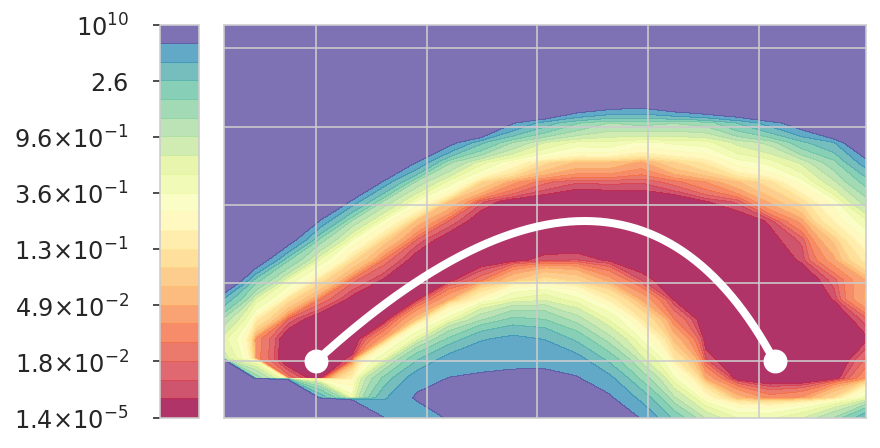

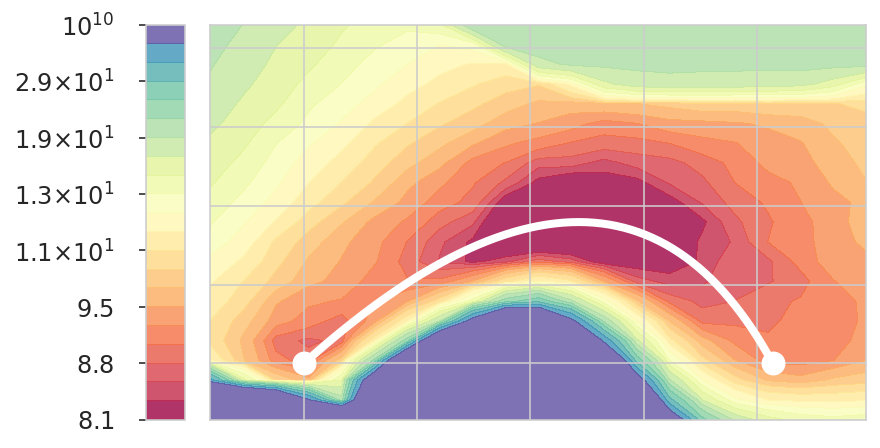

In [15]:
mu = 0.51

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)



if len(folders_all) == 1:
    # axs_sub = axs[0][0]
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_trloss(axs_sub, folders_all[0], mu=mu) # mu0.6

matplotlib.rc('grid', linewidth=0.8)


plt.savefig('cifar10_mu'+str(mu)+'_conn_train.pdf')

fig = plt.figure(figsize=(6,3), constrained_layout=True)
widths = [1]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths,
                          height_ratios=heights)


if len(folders_all) == 1:
    axs_sub = fig.add_subplot(spec5[0, 0])
    plt.setp( axs_sub.get_xticklabels(), visible=False)
    plt.setp( axs_sub.get_yticklabels(), visible=False)
    plot_plane_each_teerror(axs_sub, folders_all[0], mu=mu)


matplotlib.rc('grid', linewidth=0.8)

plt.savefig('cifar10_mu'+str(mu)+'_conn_test.pdf')